# SALARY DISCRIMINATION

Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. 
This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.

Tasks
1.Find the linear regression equation for this data using columns 1-5 to column 6.
2.Find the selection of columns with the best  𝑅2  score.
3.Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_fwf("salary.txt", header = None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.shape

(52, 6)

In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [6]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


EDA

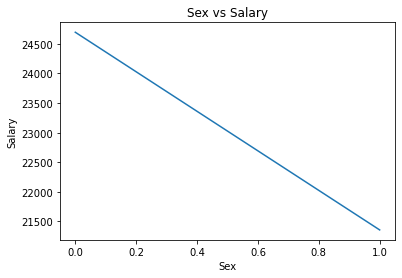

In [9]:
#Sex vs Salary
df.groupby('Sex')['Salary'].mean().plot()
#df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [33]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


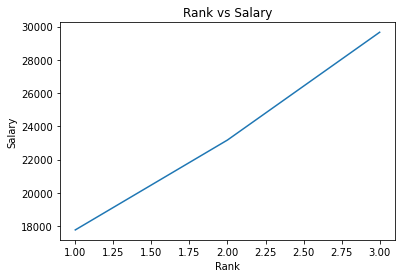

In [10]:
#Rank vs Salary
#df.plot(x='Rank', y='Salary', style='o')
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [11]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


Rank and Salary are linearly correlated. Since correlation is 0.86

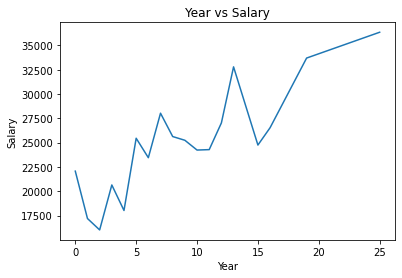

In [12]:
#Year vs Salary
#df.plot(x='Year', y='Salary', style='o')
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [13]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


Year and Salary are linearly correlated. Since the correlation is 0.7.

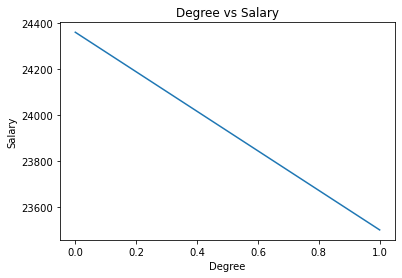

In [14]:
#Degree vs Salary
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [15]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


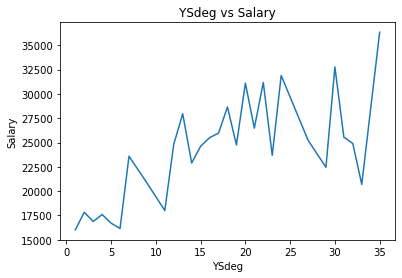

In [16]:
#YSdeg vs Salary
df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [17]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


YSdeg is linearly correlated. Since the correlation is 0.67


Tasks
1.Find the linear regression equation for this data using columns 1-5 to column 6.

In [18]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values
y = df['Salary'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

MODEL

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
coef_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coef_df

,Coefficient
Sex,1191.009056
Rank,5555.250451
Year,412.933817
Degree,-866.473810
YSdeg,-94.884773


In [22]:
regressor.intercept_ # c 

10847.216860827906

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15000,17045.051601
1,20850,20650.214811
2,35350,29927.169012
3,20300,16537.233011
4,36350,33648.872763
5,27959,28303.529070
6,25400,27003.237570
7,23300,23558.561779
8,16094,16266.976362
9,23713,18790.484839


2.Find the selection of columns with the best  𝑅2  score.


In [55]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7959308873678598


3.Report whether sex is a factor in salary.

In [56]:
coef_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coef_df

,Coefficient
Sex,1191.009056
Rank,5555.250451
Year,412.933817
Degree,-866.473810
YSdeg,-94.884773


From the coefficient table it is seen that sex plays the second major factor in salary after rank. Therefore, yes sex is a factor in salary.